In [ ]:
import torch
import matplotlib.pyplot as plt
import tqdm
import utils
import dataloaders
import numpy as np
import torchvision
import os
from trainer import Trainer
torch.random.manual_seed(0)
np.random.seed(0)
torch.backends.cudnn.benchmark = False
torch.backends.cuda.deterministic = True

### Model Definition

In [8]:
class LeNet(torch.nn.Module):

    def __init__(self):
        super().__init__()
        
        ### START YOUR CODE HERE ### (You can change anything inside this block)
        self.conv1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.conv2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.conv3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=2),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.fc1 = torch.nn.Sequential(
            torch.nn.Linear(4 * 4 * 128, 64),
            torch.nn.ReLU(),
        )
        self.fc2 = torch.nn.Sequential(
            torch.nn.Linear(64, 10)
        )
        ### END YOUR CODE HERE ### 

    def forward(self, x):
        ### START YOUR CODE HERE ### (You can change anything inside this block) 
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x
        ### END YOUR CODE HERE ### 


### Hyperparameters & Loss function

In [9]:
# Hyperparameters
batch_size = 64
learning_rate = 0.0192
num_epochs = 4


# Use CrossEntropyLoss for multi-class classification
loss_function = torch.nn.CrossEntropyLoss()

### Train model

In [10]:


image_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((32, 32)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.5], [0.25])
])
dataloader_train, dataloader_val = dataloaders.load_dataset(batch_size, image_transform)

# Model definition
model = LeNet()
# Transfer model to GPU memory (if possible)
model = utils.to_cuda(model)

# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)
trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_val=dataloader_val,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict, val_loss_dict = trainer.train(num_epochs)

Training epoch 3: 100%|██████████| 938/938 [03:32<00:00,  4.42it/s]


### Train Model

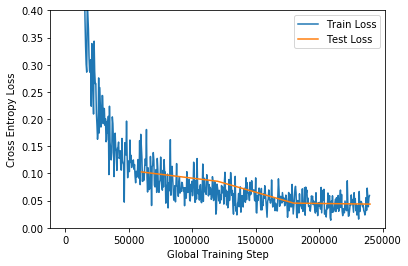

In [15]:
utils.plot_loss(train_loss_dict, label="Train Loss")
utils.plot_loss(val_loss_dict, label="Test Loss")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, .4])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
os.makedirs("image_processed", exist_ok=True)
plt.savefig(os.path.join("image_processed", "task2.png"))

plt.show()

torch.save(model.state_dict(), "saved_model.torch")


In [13]:

# %%
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_val, model, loss_function)
print("Final Validation loss: {}. Final Validation accuracy: {}".format(final_loss, final_acc))

# %%

Final Validation loss: 0.043592123244110506. Final Validation accuracy: 0.9853
